In [1]:
import numpy as np
import pandas  as pd
from pandas import Series, DataFrame
import scipy
from scipy.stats import spearmanr

from pylab import rcParams
import seaborn as sns
import seaborn as sn
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing


In [2]:
data = pd.read_csv('C:/Users/HP/Desktop/practice/paper.csv',delimiter=',')

In [4]:
#check the datasets correctnesss
data.shape
data.describe()
data.isnull().any()
data = data.fillna(method='ffill')


# Diving the multivariate into X and Y 

X = pd.DataFrame(data.iloc[:,:-15])
y = pd.DataFrame(data.iloc[:,-15])

In [4]:
X

,Pump 2,Pump 1,Sensor 0,Ultrasound Sensor,Sensor 2,Sensor 1,Sensor 3,Sensor X,Sensor Y,Sensor Z
0,0,3,128,9805,8000,2000,9000,0,0,0
1,0,3,128,9875,8000,2000,9000,0,0,0
2,0,3,128,9809,8000,2000,9000,0,0,0
3,0,3,128,9763,8000,2000,9000,0,0,0
4,0,3,128,9774,8000,2000,9000,0,0,0
5,0,3,128,9771,8000,2000,9000,0,0,0
6,0,3,128,9758,8000,2000,9000,0,0,0
7,0,3,128,9783,8000,2000,9000,0,0,0
8,0,3,128,9753,8000,2000,9000,0,0,0
9,0,3,128,9733,8000,2000,9000,0,0,0


,Pump 2,Pump 1,Sensor 0,Ultrasound Sensor,Sensor 2,Sensor 1,Sensor 3,Sensor X,Sensor Y,Sensor Z
Pump 2,1.000000,0.306424,0.470305,-0.327763,-0.575499,-0.303071,-0.553378,0.129508,0.364683,0.672417
Pump 1,0.306424,1.000000,0.505391,-0.380151,-0.383129,-0.440397,-0.803516,-0.026302,0.473174,0.695436
Sensor 0,0.470305,0.505391,1.000000,-0.312156,-0.131553,-0.383011,-0.768370,-0.034516,-0.033253,0.279760
Ultrasound Sensor,-0.327763,-0.380151,-0.312156,1.000000,0.340236,0.073057,0.483425,-0.277246,-0.291719,-0.383908
Sensor 2,-0.575499,-0.383129,-0.131553,0.340236,1.000000,0.151875,0.427417,-0.218884,-0.503512,-0.665088
Sensor 1,-0.303071,-0.440397,-0.383011,0.073057,0.151875,1.000000,0.207680,0.603098,-0.100837,-0.351448
Sensor 3,-0.553378,-0.803516,-0.768370,0.483425,0.427417,0.207680,1.000000,-0.343269,-0.389456,-0.613504
Sensor X,0.129508,-0.026302,-0.034516,-0.277246,-0.218884,0.603098,-0.343269,1.000000,0.210634,0.088529
Sensor Y,0.364683,0.473174,-0.033253,-0.291719,-0.503512,-0.100837,-0.389456,0.210634,1.000000,0.529500
Sensor Z,0.672417,0.695436,0.279760,-0.383908,-0.665088,-0.351448,-0.613504,0.088529,0.529500,1.000000


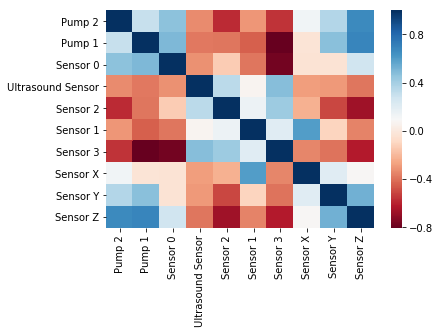

In [5]:
corr = X.corr()
display(corr)
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu")

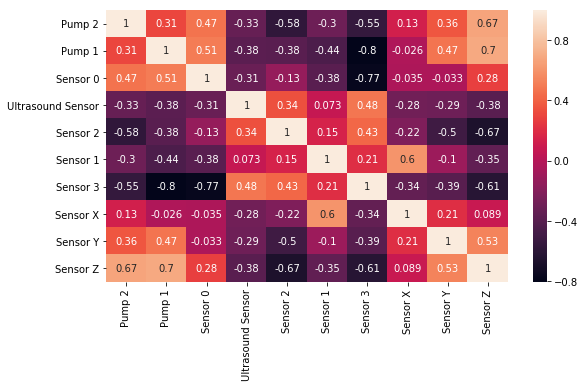

In [6]:
plt.figure(figsize=(9,5))
sns.heatmap(X.corr(), annot = True)

In [4]:
data.describe()

,Pump 2,Pump 1,Sensor 0,Ultrasound Sensor,Sensor 2,Sensor 1,Sensor 3,Sensor X,Sensor Y,Sensor Z,...,Floating Object_,Humidity,Sensor F,Sensor F_,DOS,Spoofing,Wrong Connectn,Htank 1,Htank 2,Htank 3
count,64897.000000,64897.000000,64897.000000,64897.000000,64897.000000,64897.000000,64897.000000,64897.00000,64897.000000,64897.000000,...,64897.000000,64897.000000,64897.000000,64897.000000,64897.000000,64897.000000,64897.000000,64897.000000,64897.000000,64897.000000
mean,183.368861,359.709416,448.159067,4663.263710,7256.591846,1844.997257,8242.608302,161.55377,139.311971,261.895095,...,0.011449,0.085197,0.002573,0.088001,0.004885,0.156248,0.096137,0.005501,0.004484,0.004654
std,1110.357744,1483.506590,1786.674923,2310.552324,2073.360009,996.664303,2449.137929,1145.26768,963.262172,1374.913279,...,0.106386,0.279176,0.050663,0.283299,0.069720,0.363093,0.294781,0.073965,0.066813,0.068058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,2886.000000,8000.000000,2000.000000,9000.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,7.000000,0.000000,4656.000000,8000.000000,2000.000000,9000.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,7.000000,128.000000,6491.000000,8000.000000,2000.000000,9000.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9000.000000,9808.000000,9000.000000,9989.000000,9095.000000,9214.000000,9000.000000,9000.00000,9880.000000,9000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


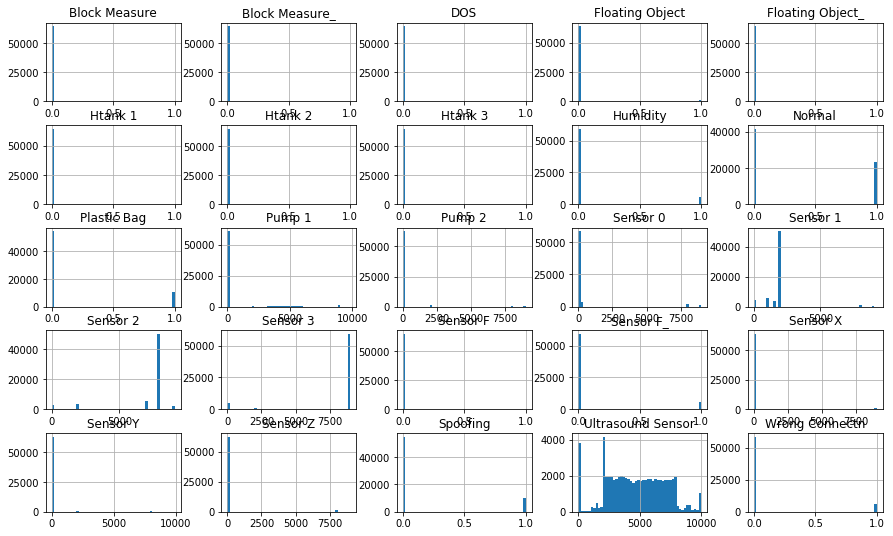

In [87]:
data.hist(figsize=(15,9), bins=50)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [6]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
y_pred = logmodel.predict(X_test)

In [8]:
print('Accuracy: %d', (logmodel.score(X_test, y_test)))

Accuracy: %d 0.6269645608628659


In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8138  152]
 [4690    0]]


In [10]:
from sklearn.metrics import classification_report

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logmodel.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logmodel.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.63
Accuracy of Logistic regression classifier on test set: 0.63


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.98      0.77      8290
           1       0.00      0.00      0.00      4690

    accuracy                           0.63     12980
   macro avg       0.32      0.49      0.39     12980
weighted avg       0.41      0.63      0.49     12980



In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

from sklearn.metrics import accuracy_score
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
yprediction = knn.predict(X_test)
print("accuracy= ",accuracy_score(y_test,yprediction))
print(classification_report(y_test, y_prediction))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy of K-NN classifier on training set: 0.74
Accuracy of K-NN classifier on test set: 0.65


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


accuracy=  0.6474576271186441


In [23]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6382126348228043
Precision: 0.0
Recall: 0.0


In [7]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 0.74
Accuracy of SVM classifier on test set: 0.65


NameError: name 'y_pred' is not defined

In [8]:
# Second Parameter (plastic Bag)

#check the datasets correctnesss
data.shape
data.describe()
data.isnull().any()
data = data.fillna(method='ffill')


# Diving the multivariate into X and Y 

X = pd.DataFrame(data.iloc[:,:-15])
y1 = pd.DataFrame(data.iloc[:,-14])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=101)

In [10]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y1_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y1_pred = logmodel.predict(X_test)
print('Accuracy: %d', (logmodel.score(X_test, y1_test)))

Accuracy: %d 0.8320493066255779


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y1_pred)
print(confusion_matrix)

[[10800   107]
 [ 2073     0]]


In [13]:
from sklearn.metrics import classification_report

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logmodel.score(X_train, y1_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logmodel.score(X_test, y1_test)))

Accuracy of Logistic regression classifier on training set: 0.83
Accuracy of Logistic regression classifier on test set: 0.83


In [14]:
#KNN NEighbor

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y1_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y1_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y1_test)))

from sklearn.metrics import accuracy_score
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y1_train)
y1prediction = knn.predict(X_test)
print("accuracy= ",accuracy_score(y1_test,y1prediction))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.84


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


accuracy=  0.8416024653312789


In [28]:
#SVM

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y1_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y1_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y1_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 0.89
Accuracy of SVM classifier on test set: 0.87


In [15]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y1_train)
y1_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Precision:",metrics.precision_score(y1_test, y1_pred))
print("Recall:",metrics.recall_score(y1_test, y1_pred))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7626348228043144
Precision: 0.297427652733119
Recall: 0.3569705740472745


In [16]:
# Third Parameter (Block measure 1)

#check the datasets correctnesss
data.shape
data.describe()
data.isnull().any()
data = data.fillna(method='ffill')


# Diving the multivariate into X and Y 

X = pd.DataFrame(data.iloc[:,:-15])
y2 = pd.DataFrame(data.iloc[:,-13])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y2_train)
y2_pred = logmodel.predict(X_test)
print('Accuracy: %d', (logmodel.score(X_test, y2_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y2_test, y2_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logmodel.score(X_train, y2_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logmodel.score(X_test, y2_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: %d 0.9940677966101695
[[12903    29]
 [   48     0]]
Accuracy of Logistic regression classifier on training set: 0.99
Accuracy of Logistic regression classifier on test set: 0.99


In [18]:
#KNN NEighbor

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y2_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y2_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y2_test)))

from sklearn.metrics import accuracy_score
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y2_train)
y2prediction = knn.predict(X_test)
print("accuracy= ",accuracy_score(y2_test,y2prediction))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


accuracy=  1.0


In [36]:
#SVM

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y2_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y2_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y2_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 1.00


In [19]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y2_train)
y2_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
print("Precision:",metrics.precision_score(y2_test, y2_pred))
print("Recall:",metrics.recall_score(y2_test, y2_pred))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9962249614791988
Precision: 0.0
Recall: 0.0


In [20]:
# fourth Parameter (Block measure 2)

#check the datasets correctnesss
data.shape
data.describe()
data.isnull().any()
data = data.fillna(method='ffill')


# Diving the multivariate into X and Y 

X = pd.DataFrame(data.iloc[:,:-15])
y3 = pd.DataFrame(data.iloc[:,-12])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y3_train)
y3_pred = logmodel.predict(X_test)
print('Accuracy: %d', (logmodel.score(X_test, y3_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y3_test, y3_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logmodel.score(X_train, y3_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logmodel.score(X_test, y3_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: %d 0.9999229583975346
[[12952     1]
 [    0    27]]
Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 1.00


In [22]:
#KNN NEighbor

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y3_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y3_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y3_test)))

from sklearn.metrics import accuracy_score
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y3_train)
y3prediction = knn.predict(X_test)
print("accuracy= ",accuracy_score(y3_test,y3prediction))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


accuracy=  0.9999229583975346


In [44]:
#SVM

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y3_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y3_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y3_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 1.00


In [23]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y3_train)
y3_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y3_test, y3_pred))
print("Precision:",metrics.precision_score(y3_test, y3_pred))
print("Recall:",metrics.recall_score(y3_test, y3_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
# fourth Parameter (Floating Object 1)

#check the datasets correctnesss
data.shape
data.describe()
data.isnull().any()
data = data.fillna(method='ffill')


# Diving the multivariate into X and Y 

X = pd.DataFrame(data.iloc[:,:-15])
y4 = pd.DataFrame(data.iloc[:,-11])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y4_train, y4_test = train_test_split(X, y4, test_size=0.2, random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y4_train)
y4_pred = logmodel.predict(X_test)
print('Accuracy: %d', (logmodel.score(X_test, y4_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y4_test, y4_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logmodel.score(X_train, y4_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logmodel.score(X_test, y4_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: %d 0.998613251155624
[[12824     0]
 [   18   138]]
Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 1.00


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [26]:
#KNN NEighbor

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y4_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y4_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y4_test)))
from sklearn.metrics import accuracy_score
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y4_train)
y4prediction = knn.predict(X_test)
print("accuracy= ",accuracy_score(y4_test,y4prediction))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]


accuracy=  0.9999229583975346


In [50]:
#SVM

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y4_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y4_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y4_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.99


In [27]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y4_train)
y4_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y4_test, y4_pred))
print("Precision:",metrics.precision_score(y4_test, y4_pred))
print("Recall:",metrics.recall_score(y4_test, y4_pred))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.999768875192604
Precision: 0.9811320754716981
Recall: 1.0


In [28]:
# fourth Parameter (Floating Object 2)

#check the datasets correctnesss
data.shape
data.describe()
data.isnull().any()
data = data.fillna(method='ffill')


# Diving the multivariate into X and Y 

X = pd.DataFrame(data.iloc[:,:-15])
y5 = pd.DataFrame(data.iloc[:,-10])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y5_train, y5_test = train_test_split(X, y5, test_size=0.2, random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y5_train)
y5_pred = logmodel.predict(X_test)
print('Accuracy: %d', (logmodel.score(X_test, y5_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y5_test, y5_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logmodel.score(X_train, y5_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logmodel.score(X_test, y5_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: %d 0.9994607087827427
[[12829     1]
 [    6   144]]
Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 1.00


In [31]:
#KNN NEighbor

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y5_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y5_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y5_test)))

from sklearn.metrics import accuracy_score
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y5_train)
y5prediction = knn.predict(X_test)
print("accuracy= ",accuracy_score(y5_test,y5prediction))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


accuracy=  0.999537750385208


In [58]:
#SVM

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y5_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y5_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y5_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.99


In [32]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y5_train)
y5_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y5_test, y5_pred))
print("Precision:",metrics.precision_score(y5_test, y5_pred))
print("Recall:",metrics.recall_score(y5_test, y5_pred))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9994607087827427
Precision: 1.0
Recall: 0.9533333333333334


In [33]:
#  (humidity)

#check the datasets correctnesss
data.shape
data.describe()
data.isnull().any()
data = data.fillna(method='ffill')


# Diving the multivariate into X and Y 

X = pd.DataFrame(data.iloc[:,:-15])
y6 = pd.DataFrame(data.iloc[:,-9])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y6_train, y6_test = train_test_split(X, y6, test_size=0.2, random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y6_train)
y6_pred = logmodel.predict(X_test)
print('Accuracy: %d', (logmodel.score(X_test, y6_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y6_test, y6_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logmodel.score(X_train, y6_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logmodel.score(X_test, y6_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: %d 1.0
[[11919     0]
 [    0  1061]]
Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 1.00


In [35]:
#KNN NEighbor

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y6_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y6_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y6_test)))

from sklearn.metrics import accuracy_score
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y6_train)
y6prediction = knn.predict(X_test)
print("accuracy= ",accuracy_score(y6_test,y6prediction))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


accuracy=  1.0


In [64]:
#SVM

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y6_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y6_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y6_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.98


In [36]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y6_train)
y6_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y6_test, y6_pred))
print("Precision:",metrics.precision_score(y6_test, y6_pred))
print("Recall:",metrics.recall_score(y6_test, y6_pred))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [37]:
# Sensor failure 1

#check the datasets correctnesss
data.shape
data.describe()
data.isnull().any()
data = data.fillna(method='ffill')


# Diving the multivariate into X and Y 

X = pd.DataFrame(data.iloc[:,:-15])
y7 = pd.DataFrame(data.iloc[:,-8])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y7_train, y7_test = train_test_split(X, y7, test_size=0.2, random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y7_train)
y7_pred = logmodel.predict(X_test)
print('Accuracy: %d', (logmodel.score(X_test, y7_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y7_test, y7_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logmodel.score(X_train, y7_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logmodel.score(X_test, y7_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: %d 0.997457627118644
[[12947     0]
 [   33     0]]
Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 1.00


In [39]:
#KNN NEighbor

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y7_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y7_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y7_test)))

from sklearn.metrics import accuracy_score
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y7_train)
y7prediction = knn.predict(X_test)
print("accuracy= ",accuracy_score(y7_test,y7prediction))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


accuracy=  1.0


In [70]:
#SVM

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y7_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y7_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y7_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 1.00


In [40]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y7_train)
y7_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y7_test, y7_pred))
print("Precision:",metrics.precision_score(y7_test, y7_pred))
print("Recall:",metrics.recall_score(y7_test, y7_pred))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9973805855161787
Precision: 0.0
Recall: 0.0


In [3]:
 #(Sensor Failure 2)

#check the datasets correctnesss
data.shape
data.describe()
data.isnull().any()
data = data.fillna(method='ffill')


# Diving the multivariate into X and Y 

X = pd.DataFrame(data.iloc[:,:-15])
y8 = pd.DataFrame(data.iloc[:,-7])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y8_train, y8_test = train_test_split(X, y8, test_size=0.2, random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y8_train)
y8_pred = logmodel.predict(X_test)
print('Accuracy: %d', (logmodel.score(X_test, y8_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y8_test, y8_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logmodel.score(X_train, y8_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logmodel.score(X_test, y8_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: %d 0.9119414483821263
[[11837     1]
 [ 1142     0]]
Accuracy of Logistic regression classifier on training set: 0.91
Accuracy of Logistic regression classifier on test set: 0.91


In [5]:
#KNN NEighbor

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y8_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y8_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y8_test)))

from sklearn.metrics import accuracy_score
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y8_train)
y8prediction = knn.predict(X_test)
print("accuracy= ",accuracy_score(y8_test,y8prediction))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Accuracy of K-NN classifier on training set: 0.93
Accuracy of K-NN classifier on test set: 0.92


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


accuracy=  0.9240369799691833


In [76]:
#SVM

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y8_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y8_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y8_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 0.94
Accuracy of SVM classifier on test set: 0.92


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y8_train)
y8_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y8_test, y8_pred))
print("Precision:",metrics.precision_score(y8_test, y8_pred))
print("Recall:",metrics.recall_score(y8_test, y8_pred))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# DOS

#check the datasets correctnesss
data.shape
data.describe()
data.isnull().any()
data = data.fillna(method='ffill')


# Diving the multivariate into X and Y 

X = pd.DataFrame(data.iloc[:,:-15])
y9 = pd.DataFrame(data.iloc[:,-6])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y9_train, y9_test = train_test_split(X, y9, test_size=0.2, random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y9_train)
y9_pred = logmodel.predict(X_test)
print('Accuracy: %d', (logmodel.score(X_test, y9_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y9_test, y9_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logmodel.score(X_train, y9_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logmodel.score(X_test, y9_test)))

In [ ]:
#KNN NEighbor

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y9_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y9_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y9_test)))

from sklearn.metrics import accuracy_score
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y9_train)
y9prediction = knn.predict(X_test)
print("accuracy= ",accuracy_score(y9_test,y9prediction))

# Spoofing

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y9_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y9_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y9_test)))

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y9_train)
y9_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y9_test, y9_pred))
print("Precision:",metrics.precision_score(y9_test, y9_pred))
print("Recall:",metrics.recall_score(y9_test, y9_pred))

In [ ]:
# Wrong connection

#check the datasets correctnesss
data.shape
data.describe()
data.isnull().any()
data = data.fillna(method='ffill')


# Diving the multivariate into X and Y 

X = pd.DataFrame(data.iloc[:,:-15])
y10 = pd.DataFrame(data.iloc[:,-5])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y10_train, y10_test = train_test_split(X, y10, test_size=0.2, random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y10_train)
y10_pred = logmodel.predict(X_test)
print('Accuracy: %d', (logmodel.score(X_test, y10_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y10_test, y10_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logmodel.score(X_train, y10_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logmodel.score(X_test, y10_test)))

In [ ]:
#KNN NEighbor

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y10_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y10_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y10_test)))

from sklearn.metrics import accuracy_score
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y10_train)
y10prediction = knn.predict(X_test)
print("accuracy= ",accuracy_score(y10_test,y10prediction))

In [100]:
#SVM

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y10_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y10_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y10_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 0.85
Accuracy of SVM classifier on test set: 0.84


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y10_train)
y10_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y10_test, y10_pred))
print("Precision:",metrics.precision_score(y10_test, y10_pred))
print("Recall:",metrics.recall_score(y10_test, y10_pred))

In [ ]:
# tANK HIT 1
#check the datasets correctnesss
data.shape
data.describe()
data.isnull().any()
data = data.fillna(method='ffill')


# Diving the multivariate into X and Y 

X = pd.DataFrame(data.iloc[:,:-15])
y11 = pd.DataFrame(data.iloc[:,-4])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y11_train, y11_test = train_test_split(X, y11, test_size=0.2, random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y11_train)
y11_pred = logmodel.predict(X_test)
print('Accuracy: %d', (logmodel.score(X_test, y11_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y11_test, y11_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logmodel.score(X_train, y11_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logmodel.score(X_test, y11_test)))

In [ ]:
#KNN NEighbor

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y11_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y11_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y11_test)))

from sklearn.metrics import accuracy_score
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y11_train)
y11prediction = knn.predict(X_test)
print("accuracy= ",accuracy_score(y11_test,y11prediction))

In [106]:
#SVM

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y11_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y11_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y11_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.97


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y11_train)
y11_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y11_test, y11_pred))
print("Precision:",metrics.precision_score(y11_test, y11_pred))
print("Recall:",metrics.recall_score(y11_test, y11_pred))

In [ ]:
# tANK HIT 

#check the datasets correctnesss
data.shape
data.describe()
data.isnull().any()
data = data.fillna(method='ffill')


# Diving the multivariate into X and Y 

X = pd.DataFrame(data.iloc[:,:-15])
y12 = pd.DataFrame(data.iloc[:,-3])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y12_train, y12_test = train_test_split(X, y12, test_size=0.2, random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y12_train)
y12_pred = logmodel.predict(X_test)
print('Accuracy: %d', (logmodel.score(X_test, y12_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y12_test, y12_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logmodel.score(X_train, y12_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logmodel.score(X_test, y12_test)))

In [ ]:
#KNN NEighbor

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y12_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y12_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y12_test)))

from sklearn.metrics import accuracy_score
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y12_train)
y12prediction = knn.predict(X_test)
print("accuracy= ",accuracy_score(y12_test,y12prediction))

In [112]:
#SVM

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y12_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y12_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y12_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 1.00


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y12_train)
y12_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y12_test, y12_pred))
print("Precision:",metrics.precision_score(y12_test, y12_pred))
print("Recall:",metrics.recall_score(y12_test, y12_pred))

In [ ]:

# tANK HIT 


data.shape
data.describe()
data.isnull().any()
data = data.fillna(method='ffill')


# Diving the multivariate into X and Y 

X = pd.DataFrame(data.iloc[:,:-15])
y13 = pd.DataFrame(data.iloc[:,-2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y13_train, y13_test = train_test_split(X, y13, test_size=0.2, random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y13_train)
y13_pred = logmodel.predict(X_test)
print('Accuracy: %d', (logmodel.score(X_test, y13_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y13_test, y13_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logmodel.score(X_train, y13_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logmodel.score(X_test, y13_test)))

In [ ]:
#KNN NEighbor

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y13_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y13_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y13_test)))

from sklearn.metrics import accuracy_score
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y13_train)
y13prediction = knn.predict(X_test)
print("accuracy= ",accuracy_score(y13_test,y13prediction))

In [118]:
#SVM

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y13_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y13_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y13_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 1.00


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y13_train)
y_pred = clf.predict(X_test)
f13rom sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y13_test, y13_pred))
print("Precision:",metrics.precision_score(y13_test, y13_pred))
print("Recall:",metrics.recall_score(y13_test, y13_pred))

In [ ]:

# fourt (WRONG CONNECT)

#check the datasets correctnesss
data.shape
data.describe()
data.isnull().any()
data = data.fillna(method='ffill')


# Diving the multivariate into X and Y 

X = pd.DataFrame(data.iloc[:,:-15])
y14 = pd.DataFrame(data.iloc[:,-1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y14_train, y14_test = train_test_split(X, y14, test_size=0.2, random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y14_train)
y14_pred = logmodel.predict(X_test)
print('Accuracy: %d', (logmodel.score(X_test, y14_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y14_test, y14_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logmodel.score(X_train, y14_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logmodel.score(X_test, y14_test)))

In [ ]:
#KNN NEighbor

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y14_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y14_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y14_test)))

from sklearn.metrics import accuracy_score
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y14_train)
y14prediction = knn.predict(X_test)
print("accuracy= ",accuracy_score(y14_test,y14prediction))

In [22]:
#SVM

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y14_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y14_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y14_test)))

from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y14_train)
y14_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y14_test, y14_pred))
print("Precision:",metrics.precision_score(y14_test, y14_pred))
print("Recall:",metrics.recall_score(y14_test, y14_pred))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 1.00


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9987673343605546
Precision: 0.7777777777777778
Recall: 1.0


In [21]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y14_train)

#Predict the response for test dataset
y14_pred = clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y14_test, y14_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y14_test, y14_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y14_test, y14_pred))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9987673343605546
Precision: 0.7777777777777778
Recall: 1.0
